<a href="https://colab.research.google.com/github/AhmadAlsebai/Patient-s-Condition-NLP-Project-Tutorial/blob/main/patient_condition_nlp_project_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Project Tutorial

To analyze patient reviews on drugs and use Natural Language Processing (NLP) techniques to classify their medical condition. This classification will help in recommending suitable drugs based on their experiences and reported symptoms, ultimately improving personalized medication suggestions.

## Importing Library

In [60]:
import pandas as pd  # Importing pandas for data manipulation and analysis
import itertools  # Importing itertools for working with iterators efficiently
import string  # Importing string module for string operations
import numpy as np  # Importing numpy for numerical computing
import seaborn as sns  # Importing seaborn for data visualization

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # Importing text vectorization tools from sklearn
from sklearn.model_selection import train_test_split  # Importing function to split data into training and testing sets
from sklearn.linear_model import PassiveAggressiveClassifier  # Importing PassiveAggressiveClassifier for text classification
from sklearn.naive_bayes import MultinomialNB  # Importing Naive Bayes classifier for text classification
from sklearn import metrics  # Importing metrics module for evaluating model performance
import matplotlib.pyplot as plt  # Importing matplotlib for data visualization

# To show all the rows of pandas dataframe
pd.set_option('display.max_rows', None)  # Setting pandas option to display all rows of a DataFrame


Read the Data

In [61]:
import csv
data_frame = pd.read_csv('drugsComTrain.tsv', sep='\t', quoting=csv.QUOTE_NONE, encoding='utf-8', on_bad_lines='skip')

In [62]:
data_frame.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""""""It has no side effect, I take it in combina...",9.0,"May 20, 2012",27.0
1,95260,Guanfacine,ADHD,"""""""My son is halfway through his fourth week o...",NaN,NaN,NaN
2,We have tried many different medications and s...,8.0,"April 27, 2010",192,NaN,NaN,NaN
3,92703,Lybrel,Birth Control,"""""""I used to take another oral contraceptive, ...",NaN,NaN,NaN
4,The positive side is that I didn&#039;t have a...,5.0,"December 14, 2009",17,NaN,NaN,NaN


In [63]:
data_frame.condition.value_counts().head(10)  # Counts and displays the number of occurrences of each unique condition in the dataset

,count
condition,
Birth Control,28788
Depression,9069
Pain,6145
Anxiety,5904
Acne,5588
Bipolar Disorde,4224
Insomnia,3673
Weight Loss,3609
Obesity,3568


In [64]:
data_frame_train = data_frame[(data_frame['condition'] == 'Birth Control') |  (data_frame['condition'] == 'Depression') |  (data_frame['condition'] == 'High Blood Pressure')
|  (data_frame['condition'] == 'Diabetes, Type 2')  ]  # Filtering the dataset to include only specific conditions

In [65]:
data_frame_train.shape

(42732, 7)

In [66]:
X = data_frame_train.drop(['Unnamed: 0', 'drugName', 'rating', 'date', 'usefulCount'], axis=1)

Goal: To remove unnecessary columns that are not needed for the analysis.
**.drop([...], axis=1) **→ Removes specified columns.

**'Unnamed: 0' **→ Likely an index column from CSV.

**'drugName' **→ The drug name, which might not be useful for text analysis.

**'rating' **→ A numerical score, not needed if focusing on text.

**'date'** → The date of the review, not required.

**'usefulCount'** → Number of upvotes on a review, may not be useful for classification.

In [67]:
X.condition.value_counts()

,count
condition,
Birth Control,28788
Depression,9069
"Diabetes, Type 2",2554
High Blood Pressure,2321


In [68]:
# Segregating dataframe for analyzing individual conditions

X_birth = X[X['condition'] == 'Birth Control']  # Filtering records where condition is 'Birth Control'
X_dep = X[X['condition'] == 'Depression']  # Filtering records where condition is 'Depression'
X_bp = X[X['condition'] == 'High Blood Pressure']  # Filtering records where condition is 'High Blood Pressure'
X_diab = X[X['condition'] == 'Diabetes, Type 2']  # Filtering records where condition is 'Diabetes, Type 2'


In [69]:
print(X_birth.head(10))

        condition                                             review
3   Birth Control  """I used to take another oral contraceptive, ...
5   Birth Control  """This is my first time using any form of bir...
11  Birth Control  """I had been on the pill for many years. When...
18  Birth Control  """Started Nexplanon 2 months ago because I ha...
27  Birth Control  """Nexplanon does its job. I can have worry fr...
73  Birth Control  """Never again! After being on depo I was supp...
75  Birth Control  """I was put on Yasmin for 6 months to regulat...
77  Birth Control  """I have been on this for 8 months and sad to...
78  Birth Control  """I was off birth control for a while conside...
82  Birth Control               """it caused me to gain 30 pounds"""


Text(0.5, 1.0, 'Word cloud for Diabetes')

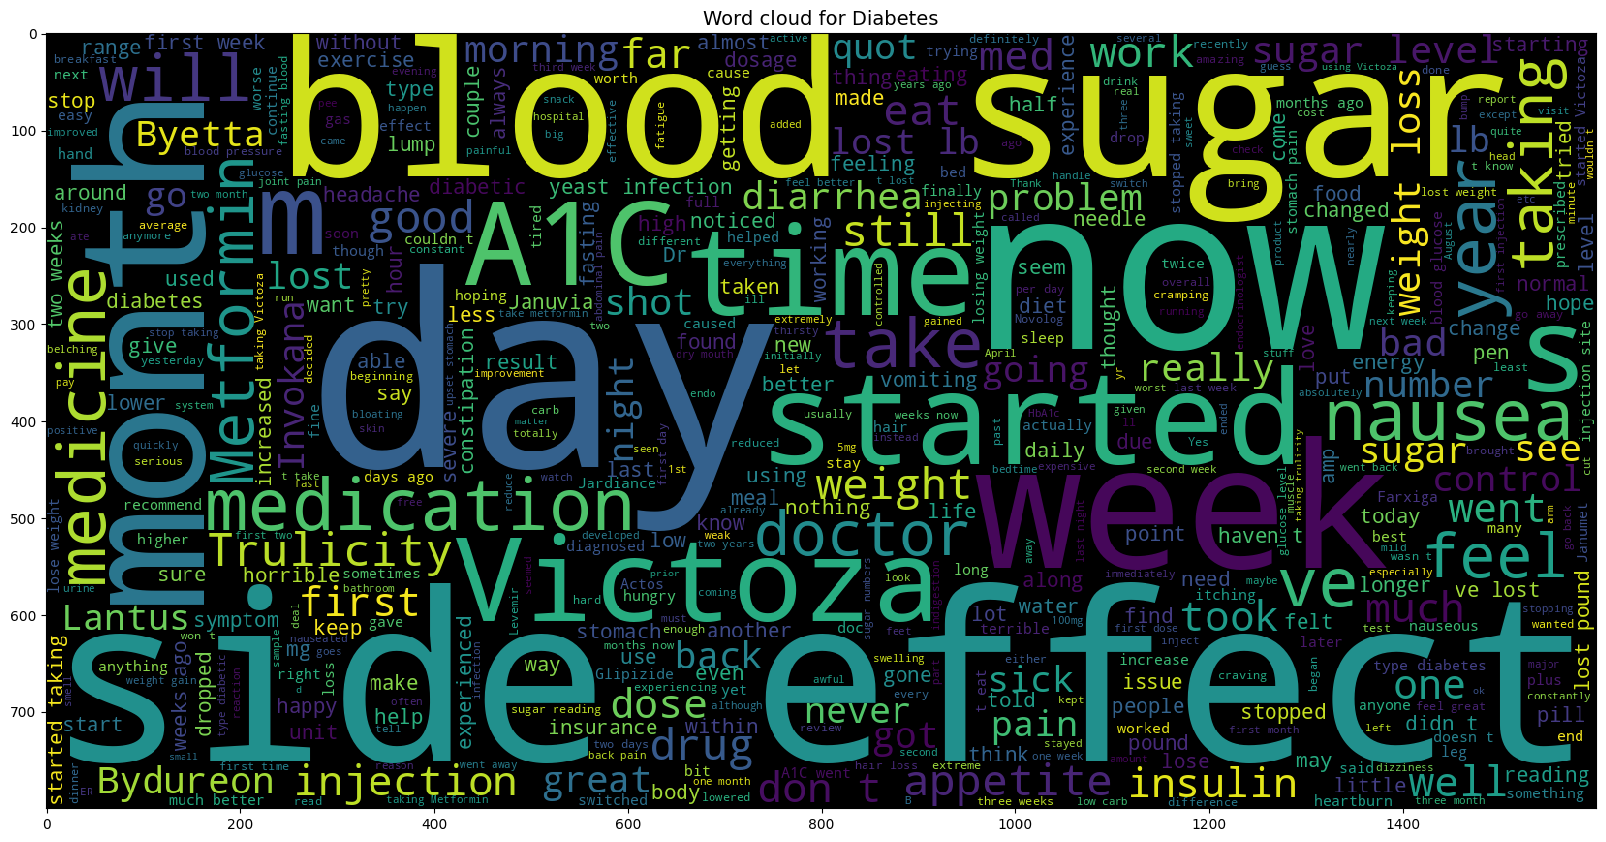

In [70]:
from wordcloud import WordCloud  # Importing WordCloud for generating word cloud visualizations

plt.figure(figsize=(20,20))  # Setting figure size for the next word cloud
wc = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(X_diab.review))
# Creating a word cloud from the 'review' column of the 'X_diab' dataset (Diabetes reviews)
plt.imshow(wc, interpolation='nearest')  # Displaying the word cloud
plt.title('Word cloud for Diabetes', fontsize=14)  # Setting the title for the plot


Text(0.5, 1.0, 'Word cloud for Depression')

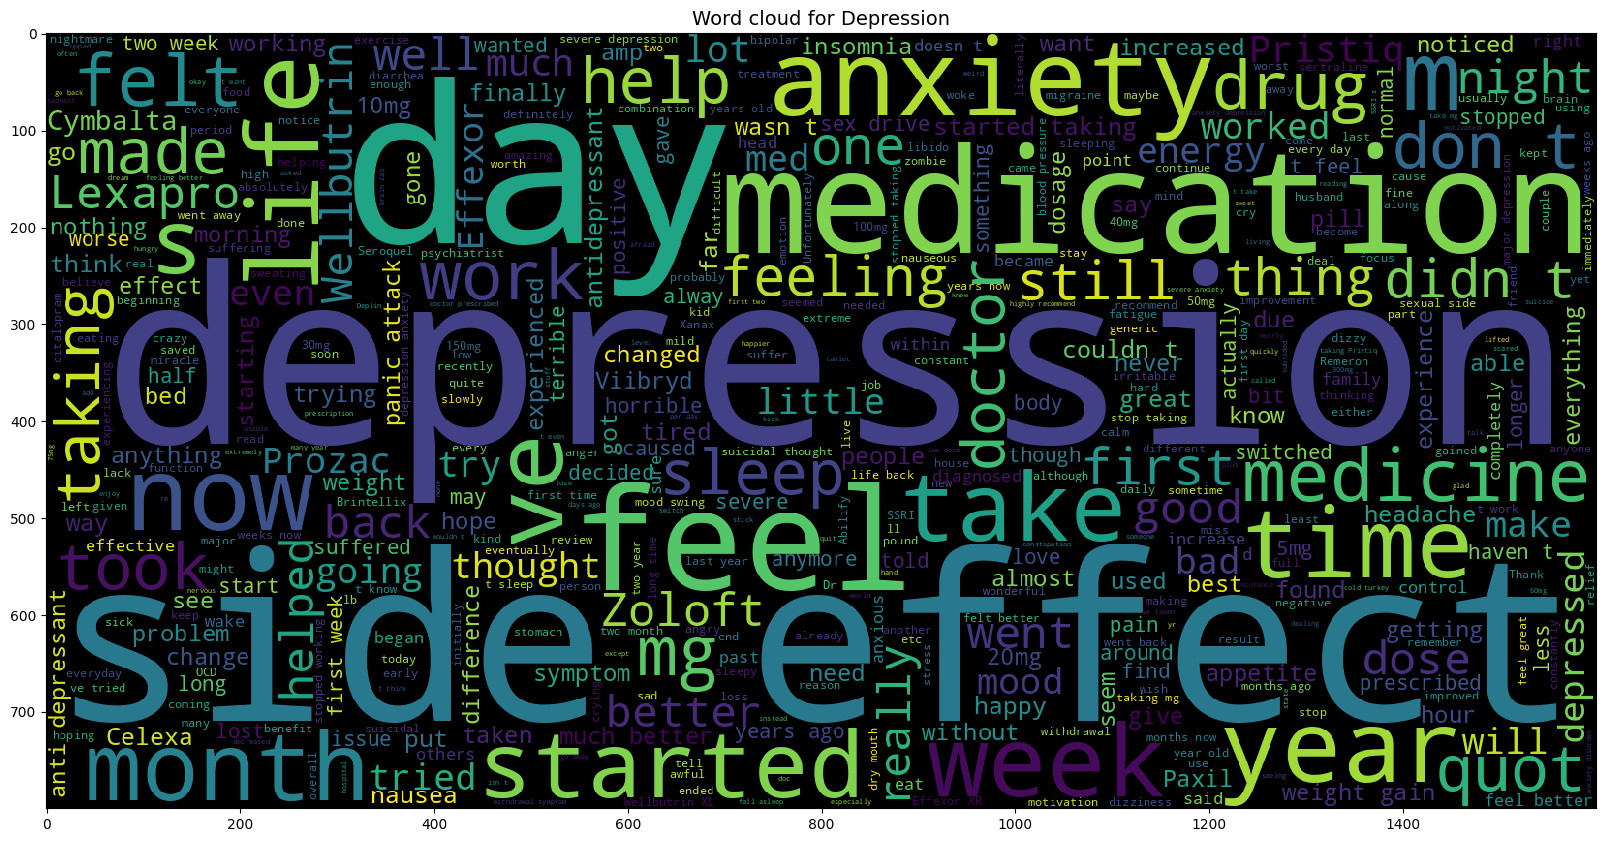

In [71]:
plt.figure(figsize=(20,20))  # Setting figure size for the next word cloud
wc = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(X_dep.review))
# Creating a word cloud from the 'review' column of the 'X_diab' dataset (Depression reviews)
plt.imshow(wc, interpolation='nearest')  # Displaying the word cloud
plt.title('Word cloud for Depression', fontsize=14)  # Setting the title for the plot

In [72]:
X['review'].iloc[3]

'"""I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.'

In [73]:
X['review'].iloc[11]

'"""I have been on this for 8 months and sad to say it&#039;s caused nothing but my self esteem to become lower. I&#039;ve gained 10 lbs out of no where. I&#039;m only 22 and have a fast metabolism. I thought it started to slow down but it didn&#039;t make sense. My breasts got smaller, I have lost complete sex drive, my breasts aren&#039;t sensitive anymore at all like they used to be and I&#039;m so emotional, even crying at times. The only thing I can say is that it is 100% effective but not worth what it has done to my body. Not only that but I started breaking out on my body and on my face as well."""'

In [74]:
X.head()

,condition,review
3,Birth Control,"""""""I used to take another oral contraceptive, ..."
5,Birth Control,"""""""This is my first time using any form of bir..."
11,Birth Control,"""""""I had been on the pill for many years. When..."
13,Depression,"""""""I have taken anti-depressants for years, wi..."
18,Birth Control,"""""""Started Nexplanon 2 months ago because I ha..."


In [75]:
print(X.columns)  # Check available column names

Index(['condition', 'review'], dtype='object')


In [76]:
import nltk
nltk.download('stopwords')  #To filter out unimportant words and focus on the key terms in text analysis.
from nltk.corpus import stopwords # Provides a list of common words (stopwords) in various languages to filter out irrelevant terms.
allstopwords = stopwords.words('english') # Get the list of English stopwords
allstopwords.remove('not') # Remove 'not' from stopwords to retain its meaning in sentiment analysis

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [77]:
from nltk.stem import WordNetLemmatizer  # Import lemmatizer for word normalization
from nltk.stem import PorterStemmer  # Import stemming algorithm
nltk.download('wordnet')  # Ensure WordNet is downloaded
porter = PorterStemmer()  # Initialize Porter Stemmer
lemmatizer = WordNetLemmatizer()  # Initialize WordNet Lemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [78]:
import re
# Function to clean the text
def clean_review(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove non-alphabetic characters
    text = text.lower().split()  # Convert to lowercase and split into words
    text = [porter.stem(word) for word in text if not word in set(allstopwords)]  # Apply stemming and remove stopwords
    text = [lemmatizer.lemmatize(word) for word in text]  # Apply lemmatization
    return ' '.join(text)  # Rejoin words into a cleaned sentence

In [79]:
print (len(X))

42732


In [80]:
X['review_cleaned'] = X['review'].apply(clean_review)  # Apply the cleaning function to the 'review' column

In [81]:
# Display the first few rows
X.head()

,condition,review,review_cleaned
3,Birth Control,"""""""I used to take another oral contraceptive, ...",use take anoth oral contracept pill cycl happi...
5,Birth Control,"""""""This is my first time using any form of bir...",first time use form birth control glad went pa...
11,Birth Control,"""""""I had been on the pill for many years. When...",pill mani year doctor chang rx chateal effect ...
13,Depression,"""""""I have taken anti-depressants for years, wi...",taken anti depress year improv mostli moder se...
18,Birth Control,"""""""Started Nexplanon 2 months ago because I ha...",start nexplanon month ago minim amount contrac...


## Creating feature and Target Variable

In [82]:
# Select the feature (independent variable) from the dataset
X_feat = X['review_cleaned']  # Feature: Cleaned review text

In [83]:
# Select the target (dependent variable) from the dataset
y = X['condition']  # Target variable: Condition (classification label)

In [84]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split  # Import function for splitting

X_train, X_test, y_train, y_test = train_test_split(
    X_feat, y,  # Input features and target variable
    stratify=y,  # Ensures equal class distribution in train/test sets
    test_size=0.2,  # 20% of the data will be used for testing
    random_state=0  # Set seed for reproducibility
)

Why is Stratification Important?

If the dataset is imbalanced (e.g., more positive reviews than negative ones), stratification ensures that both train and test sets have a similar class distribution.
This helps prevent biased model training.

In [85]:

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    Function to plot a confusion matrix.

    Parameters:
    cm : array-like
        Confusion matrix values.
    classes : list
        List of class labels.
    normalize : bool, optional
        If True, normalizes the confusion matrix.
    title : str, optional
        Title of the plot.
    cmap : matplotlib colormap, optional
        Colormap used for visualization.
    """

    # Display the confusion matrix as an image
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)  # Set the plot title
    plt.colorbar()  # Add a color scale for reference

    # Define tick marks for class labels
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)  # X-axis labels (Predicted Labels)
    plt.yticks(tick_marks, classes)  # Y-axis labels (True Labels)

    # Normalize the confusion matrix if required
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Convert to percentages
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    # Set a threshold to determine text color (white or black)
    thresh = cm.max() / 2.

    # Loop through the confusion matrix and add the value in each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],  # Place text in each cell
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")  # Use contrasting text color

    # Adjust layout and labels for better visualization
    plt.tight_layout()
    plt.ylabel('True label')  # Y-axis label
    plt.xlabel('Predicted label')  # X-axis label


## Bag of words

In [86]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer and remove common English stopwords
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data into a bag-of-words representation
count_train = count_vectorizer.fit_transform(X_train)

# Transform the test data using the same vocabulary from training
count_test = count_vectorizer.transform(X_test)


✅ CountVectorizer() converts text into a numerical matrix based on word counts.

✅ stop_words='english' removes common words like "the", "and", "is" to improve accuracy.

✅ fit_transform(X_train) learns vocabulary from training data and applies transformation.

✅ transform(X_test) applies the learned vocabulary to the test set (without refitting).

## Training the Naive Bayes model on the Training set

In [87]:
from sklearn.naive_bayes import MultinomialNB

# Initialize Naïve Bayes classifier
mnb = MultinomialNB()

# Train the model using the bag-of-words features and corresponding labels
mnb.fit(count_train, y_train)


MultinomialNB()

✅ MultinomialNB() is best for text classification since it works well with frequency-based features.

✅ fit(count_train, y_train) trains the model on the training dataset.

In [88]:
from sklearn import metrics

# Predict labels for test data
pred = mnb.predict(count_test)

# Calculate accuracy of the model
score = metrics.accuracy_score(y_test, pred)

# Print accuracy score
print("Accuracy:  %0.3f" % score)


Accuracy:  0.966


Confusion matrix, without normalization


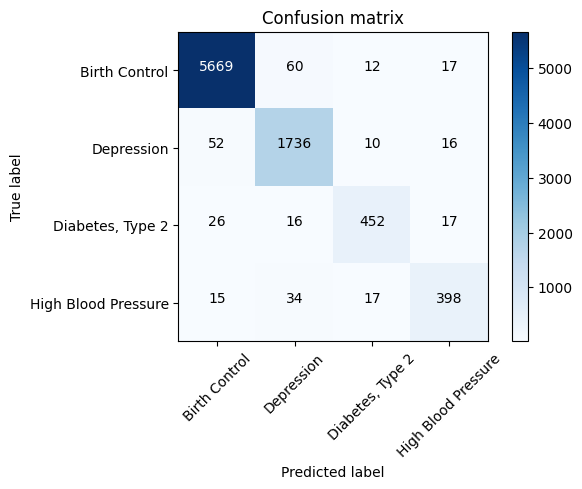

In [89]:
# Compute confusion matrix to evaluate classification performance
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure'])

# Plot the confusion matrix
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure'])


## Passive Aggressive Classifier

In [90]:
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression  # Import classifiers

# Initialize the Passive Aggressive Classifier
passive = PassiveAggressiveClassifier()

# Train the model on the training dataset
passive.fit(count_train, y_train)


PassiveAggressiveClassifier()

In [91]:
# Predict labels for the test dataset
pred = passive.predict(count_test)

# Calculate accuracy of the model
score = metrics.accuracy_score(y_test, pred)

# Print accuracy score
print("Accuracy:  %0.3f" % score)

Accuracy:  0.974


Confusion matrix, without normalization


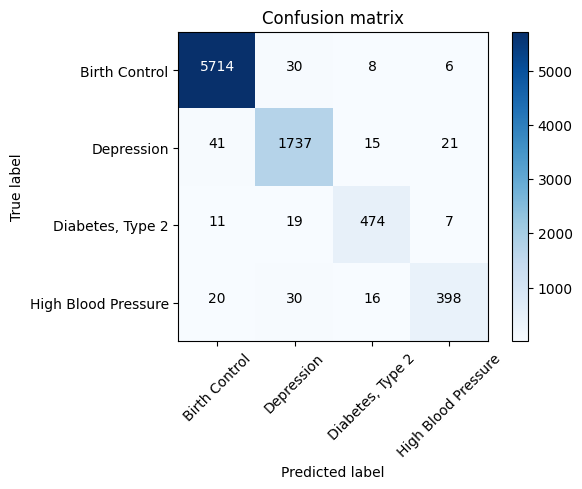

In [92]:
# Compute confusion matrix to evaluate classification performance
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure'])

# Plot the confusion matrix
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure'])

## TFIDF

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer  # Import TF-IDF vectorizer

# Initialize TF-IDF Vectorizer with English stopwords and a max_df threshold
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)

# Fit the vectorizer on the training data and transform it into a TF-IDF matrix
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data using the learned vocabulary and IDF weights
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

TF-IDF is a technique used to convert text into numerical features.

Unlike CountVectorizer, TF-IDF considers word importance by reducing the weight of frequently occurring words.

stop_words='english' → Removes common words like "the", "is", "and".

max_df=0.8 → Ignores words that appear in more than 80% of documents (removes very frequent words like "the" that are not useful).


Learns the vocabulary & IDF weights from the training data.
Converts X_train into a TF-IDF weighted feature matrix.

In [94]:
print(tfidf_train_2)

  (0, 7690)	0.1469450372963654
  (0, 9469)	0.20442280020030942
  (0, 4958)	0.18281124988999015
  (0, 6631)	0.27145471808896693
  (0, 10037)	0.11544595737446849
  (0, 5923)	0.2348041973964446
  (0, 6548)	0.3666873668083464
  (0, 1174)	0.2566408098210847
  (0, 4555)	0.13719367807718316
  (0, 18)	0.15399401124121648
  (0, 8962)	0.2746434111045531
  (0, 876)	0.16386817096533945
  (0, 3491)	0.08511838221831641
  (0, 8983)	0.18415762466448657
  (0, 8505)	0.17438420186148637
  (0, 9401)	0.10362215609640715
  (0, 9879)	0.11956228766746722
  (0, 5283)	0.20629349990229884
  (0, 10847)	0.1786992843920368
  (0, 4612)	0.1697518121672874
  (0, 4392)	0.10942968581605601
  (0, 9037)	0.2407040627888609
  (0, 6531)	0.22949990052758423
  (0, 8587)	0.12328243954444021
  (0, 3882)	0.2796748255033849
  :	:
  (34184, 1593)	0.1315598785329978
  (34184, 5117)	0.22817841052993704
  (34184, 7768)	0.09972949946660314
  (34184, 8049)	0.11273851040412022
  (34184, 1017)	0.1374359542313641
  (34184, 833)	0.123552297

In [95]:
# Train the model using the bag-of-words features and corresponding labels
mnb.fit(tfidf_train_2, y_train)
# Predict labels for the test dataset
pred = passive.predict(tfidf_test_2)

# Calculate accuracy of the model
score = metrics.accuracy_score(y_test, pred)

# Print accuracy score
print("Accuracy:  %0.3f" % score)

Accuracy:  0.972


Confusion matrix, without normalization


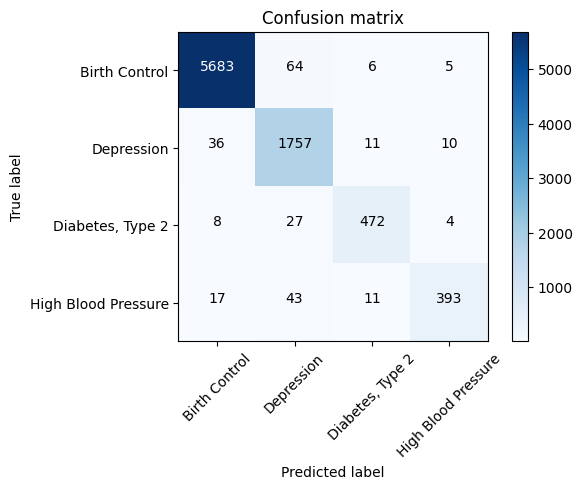

In [96]:
# Compute confusion matrix to evaluate classification performance
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure'])

# Plot the confusion matrix
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure'])

Accuracy:  0.982
Confusion matrix, without normalization


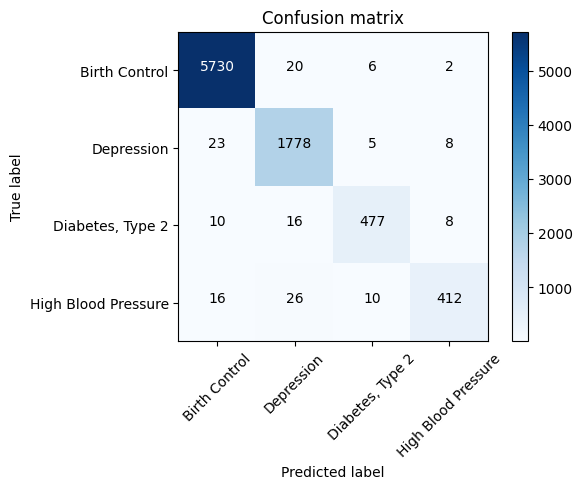

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer  # Import TF-IDF vectorizer

# Step 1: Initialize TF-IDF Vectorizer with Bigrams
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
# - stop_words='english': Removes common English words (e.g., "the", "is", "and").
# - max_df=0.8: Ignores words that appear in more than 80% of documents (removes too frequent words).
# - ngram_range=(1,2): Extracts both unigrams (single words) and bigrams (two-word sequences).

# Step 2: Fit TF-IDF on Training Data and Transform Text
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)

# Step 3: Transform the Test Data Using the Learned Vocabulary
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)

# Step 4: Train a Passive Aggressive Classifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics

pass_tf = PassiveAggressiveClassifier()  # Initialize classifier
pass_tf.fit(tfidf_train_2, y_train)  # Train the model

# Step 5: Predict Labels for the Test Set
pred = pass_tf.predict(tfidf_test_2)

# Step 6: Evaluate Model Performance (Accuracy Score)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy:  %0.3f" % score)  # Print accuracy with 3 decimal places

# Step 7: Compute Confusion Matrix
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure'])

# Step 8: Plot the Confusion Matrix
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure'])


Accuracy:  0.983
Confusion matrix, without normalization


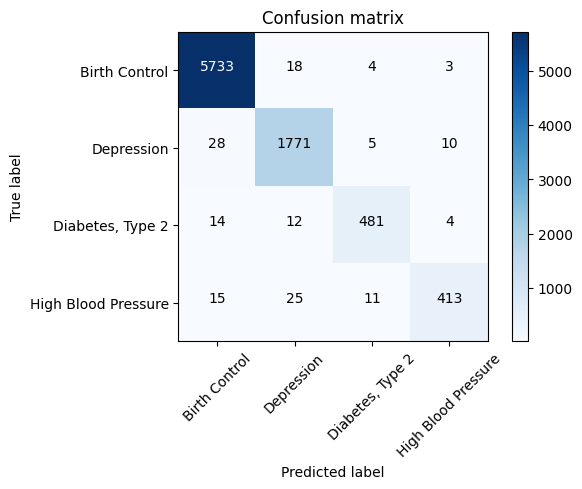

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer  # Import TF-IDF vectorizer

# Step 1: Initialize TF-IDF Vectorizer with Bigrams
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
# - stop_words='english': Removes common English words (e.g., "the", "is", "and").
# - max_df=0.8: Ignores words that appear in more than 80% of documents (removes too frequent words).
# - ngram_range=(1,2): Extracts both unigrams (single words) and bigrams (two-word sequences).

# Step 2: Fit TF-IDF on Training Data and Transform Text
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)

# Step 3: Transform the Test Data Using the Learned Vocabulary
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)

# Step 4: Train a Passive Aggressive Classifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics

pass_tf = PassiveAggressiveClassifier()  # Initialize classifier
pass_tf.fit(tfidf_train_2, y_train)  # Train the model

# Step 5: Predict Labels for the Test Set
pred = pass_tf.predict(tfidf_test_2)

# Step 6: Evaluate Model Performance (Accuracy Score)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy:  %0.3f" % score)  # Print accuracy with 3 decimal places

# Step 7: Compute Confusion Matrix
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure'])

# Step 8: Plot the Confusion Matrix
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure'])


## Information

In [99]:
def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):
    """
    Finds and prints the most informative features (words) for a given class in a trained classifier.

    Parameters:
    - vectorizer: TF-IDF vectorizer used for text transformation
    - classifier: Trained linear classifier (e.g., logistic regression)
    - classlabel: The target class for which to extract important features
    - n: Number of top features to display (default is 10)
    """

    # Get the index of the specified class label
    labelid = list(classifier.classes_).index(classlabel)

    # Retrieve feature (word) names from the vectorizer (use get_feature_names_out instead of get_feature_names)
    feature_names = vectorizer.get_feature_names_out()

    # Get the feature importance (coefficient) for the specified class
    topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]  # Sort and get top n features

    # Print the most informative features for the class
    for coef, feat in topn:
        print(classlabel, feat, coef)


In [100]:
# Calling the function for different medical conditions to extract important features
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Birth Control')


Birth Control condit 0.5092737681999449
Birth Control sideeffect 0.5269676526778537
Birth Control dissuad 0.5340929116328075
Birth Control afteri 0.5530559959731463
Birth Control unstabl 0.5538236409603906
Birth Control alc 0.5885607408487669
Birth Control estrang 0.6566027563793095
Birth Control diminish 0.6922014724798915
Birth Control cylc 1.388366884319732
Birth Control insomia 6.817978110140107


In [101]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Depression')


Depression hct 0.4641969899971006
Depression effexol 0.4696350068568203
Depression xulanepatch 0.47136229244602246
Depression balziva 0.6505733799759609
Depression basebal 0.8249382898611519
Depression diazepam 0.932500476514032
Depression experiemc 0.958221261120763
Depression anem 1.1191930751774606
Depression yoga 1.3740259830182788
Depression apprieci 3.9278993240328828


In [102]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'High Blood Pressure')


High Blood Pressure hypnic 0.5378898173731324
High Blood Pressure hypnotherapi 0.5378898173731324
High Blood Pressure index 0.5466674238328734
High Blood Pressure grandson 0.5662707526803595
High Blood Pressure bodili 0.5672540478980168
High Blood Pressure inadequ 0.6219213713192685
High Blood Pressure grip 0.6411179367205249
High Blood Pressure hold 0.7009684913170819
High Blood Pressure worthi 0.7395456072423108
High Blood Pressure india 1.0525902226833834


In [103]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Diabetes, Type 2')

Diabetes, Type 2 bog 0.43360587845148946
Diabetes, Type 2 stabel 0.43598095144163934
Diabetes, Type 2 hamper 0.44646948024507593
Diabetes, Type 2 abysm 0.4593456858342288
Diabetes, Type 2 stabilis 0.4660406984893405
Diabetes, Type 2 schizophrenia 0.4672981465056602
Diabetes, Type 2 inadequ 0.46973879133769925
Diabetes, Type 2 technician 0.49907092334302117
Diabetes, Type 2 injuri 0.7419198155093769
Diabetes, Type 2 taken 3.0236256600893476


## Sample Prediction

In [124]:
# Define a sample text for classification
#text = ["I have been feeling extremely thirsty and urinating frequently. My doctor prescribed me insulin for better blood sugar control."]
#text = ["My blood sugar levels are always high after meals, and I feel fatigued all the time."]
#text = ["I started taking Metformin, and my glucose levels have improved, but I still feel dizzy sometimes."]
#text4 = ["I have been experiencing frequent headaches and dizziness. My doctor put me on Amlodipine to control my blood pressure."]
#text5 = ["I feel a lot of pressure in my chest, and my blood pressure readings have been consistently high."]
text = ["After starting Lisinopril, my hypertension has improved, but I still get occasional swelling in my legs."]

# - This text will be classified using the trained model.

# Transform the input text using the trained TF-IDF vectorizer
test = tfidf_vectorizer2.transform(text)
# - Converts raw text into a numerical feature matrix using TF-IDF.
# - Uses the same vocabulary and IDF weights from the trained model.
print (test)



  (0, 468716)	1.0


In [125]:
# Predict the class label using the trained Passive Aggressive Classifier
pred1 = pass_tf.predict(test)[0]
# - The model predicts the category of the given text.
# - `[0]` extracts the first prediction from the output array.

# Print the predicted category
pred1
# - Displays the predicted label.

'High Blood Pressure'

In [126]:
print(len(tfidf_vectorizer.get_feature_names_out()))  # Compare with training


11273


In [127]:
print(tfidf_train_2.shape, test.shape)  # Check if feature count matches


(34185, 964827) (1, 964827)
